# Importing Libraries

In [2]:
!pip install keras

In [3]:
!pip install tensorflow

In [4]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [12]:
import keras
print(keras.__version__)


3.1.1


In [6]:
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.models import model_from_json
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
 #Intialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale = 1./255)
validation_data_gen = ImageDataGenerator(rescale = 1./255)

In [8]:
train_directory = 'E:/Minor Project/Datasets/images dataset/train' #loading dataset
test_directory = 'E:/Minor Project/Datasets/images dataset/test'

In [9]:
#preprocess train data
train_generator = train_data_gen.flow_from_directory( #generates batches
          'E:/Minor Project/Datasets/images dataset/train',
          target_size =(48,48), #resize
          batch_size =64, 
          color_mode="grayscale",
          class_mode='categorical', 
          shuffle=True  # Ensure data is shuffled for better randomness
          )

Found 28709 images belonging to 7 classes.


In [10]:
#preprocess test data
validation_generator = validation_data_gen.flow_from_directory(
          'E:/Minor Project/Datasets/images dataset/test',
          target_size =(48,48),
          batch_size =64,
          color_mode="grayscale",
          class_mode='categorical',
          shuffle=False  # Validation data should not be shuffled
          )

Found 7178 images belonging to 7 classes.


In [11]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(48,48,1)))
# adds 2d convolutional layer, 32 filters or kernel, extract features
emotion_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size =(2,2)))
#spatial dimensions of feature map , reducing dimensions 
emotion_model.add(Dropout(0.25))
#learns training data and also the noise 
emotion_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size =(2,2)))
emotion_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size =(2,2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

emotion_model.compile(loss='categorical_crossentropy',
                      optimizer=Adam(learning_rate=0.0001,decay =1e-6),
                      metrics=['accuracy'])


C:\Users\Admin\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [22]:
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

epochs = 50
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}:")
    train_history = emotion_model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        verbose=1
    )

Epoch 1/50:
449/449 ━━━━━━━━━━━━━━━━━━━━ 922s 2s/step - accuracy: 0.2504 - loss: 1.8312 - val_accuracy: 0.3292 - val_loss: 1.7180
Epoch 2/50:
449/449 ━━━━━━━━━━━━━━━━━━━━ 438s 968ms/step - accuracy: 0.3423 - loss: 1.6732 - val_accuracy: 0.4047 - val_loss: 1.5508
Epoch 3/50:
449/449 ━━━━━━━━━━━━━━━━━━━━ 133s 294ms/step - accuracy: 0.3979 - loss: 1.5522 - val_accuracy: 0.4379 - val_loss: 1.4719
Epoch 4/50:
449/449 ━━━━━━━━━━━━━━━━━━━━ 109s 242ms/step - accuracy: 0.4282 - loss: 1.4892 - val_accuracy: 0.4646 - val_loss: 1.4092
Epoch 5/50:
449/449 ━━━━━━━━━━━━━━━━━━━━ 109s 243ms/step - accuracy: 0.4545 - loss: 1.4278 - val_accuracy: 0.4657 - val_loss: 1.3838
Epoch 6/50:
449/449 ━━━━━━━━━━━━━━━━━━━━ 121s 269ms/step - accuracy: 0.4834 - loss: 1.3641 - val_accuracy: 0.4999 - val_loss: 1.3135
Epoch 7/50:
449/449 ━━━━━━━━━━━━━━━━━━━━ 165s 368ms/step - accuracy: 0.4985 - loss: 1.3194 - val_accuracy: 0.5085 - val_loss: 1.2905
Epoch 8/50:
449/449 ━━━━━━━━━━━━━━━━━━━━ 201s 448ms/step - accuracy: 0.5

Epoch 50/50:
449/449 ━━━━━━━━━━━━━━━━━━━━ 241s 536ms/step - accuracy: 0.8708 - loss: 0.3694 - val_accuracy: 0.6268 - val_loss: 1.2130


In [16]:
# Save model architecture to JSON
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)


In [22]:

label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [32]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def ef(image_path):
    # Load the image
    img = load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    # Convert the image to an array
    img_array = img_to_array(img)
    # Expand dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the pixel values
    img_array /= 255.0
    return img_array

In [33]:
# Assuming you've defined and trained your model earlier and named it emotion_model
image_path = r'E:\Minor Project\Datasets\images dataset\train\neutral\Training_98123.jpg'
print("Original image is of neutral")
img = ef(image_path)
pred = emotion_model.predict(img)  # Using emotion_model as your model variable
pred_label = np.argmax(pred)

emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_emotion_label = emotion_labels[pred_label]
print("Model prediction is:", predicted_emotion_label)


Original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Model prediction is: Neutral


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

Original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
model prediction is  surprise


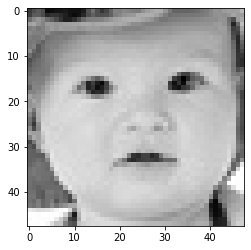

In [37]:
image_path = r'E:\Minor Project\Datasets\images dataset\train\neutral\Training_98123.jpg'
print("Original image is of Dneutral")
img = ef(image_path)
pred = emotion_model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')